Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 256, 256,  │        640 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 256, 256,  │     36,928 │ conv2d_30[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 128, 128,  │          0 │ conv2d_31[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_32 (Conv2D)  │ (None, 128, 128,  │     73,856 │ max_pooling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_33 (Conv2D)  │ (None, 128, 128,  │    147,584 │ conv2d_32[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 64, 64,    │          0 │ conv2d_33[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_34 (Conv2D)  │ (None, 64, 64,    │    295,168 │ max_pooling2d_7[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_35 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_34[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 32, 32,    │          0 │ conv2d_35[0][0]   │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_36 (Conv2D)  │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_8[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_37 (Conv2D)  │ (None, 32, 32,    │  2,359,808 │ conv2d_36[0][0]   │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_6     │ (None, 64, 64,    │          0 │ conv2d_37[0][0]   │
│ (UpSampling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 64, 64,    │          0 │ up_sampling2d_6[… │
│ (Concatenate)       │ 768)              │            │ conv2d_35[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_38 (Conv2D)  │ (None, 64, 64,    │  1,769,728 │ concatenate_6[0]… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_39 (Conv2D)  │ (None, 64, 64,    │    590,080 │ conv2d_38[0][0]   │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_7     │ (None, 128, 128,  │          0 │ conv2d_39[0][0] 

 Total params: 7,781,761 (29.69 MB)

 Trainable params: 7,781,761 (29.69 MB)

 Non-trainable params: 0 (0.00 B)

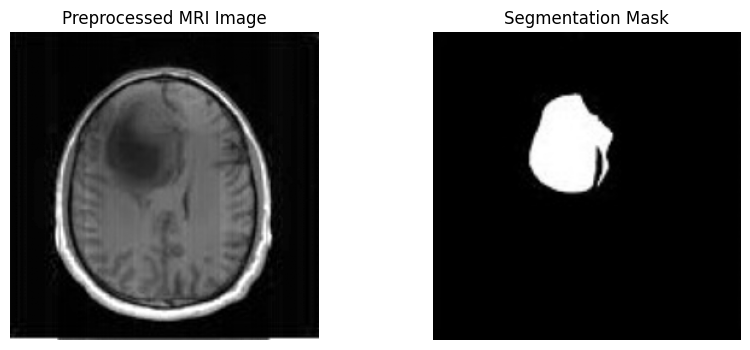

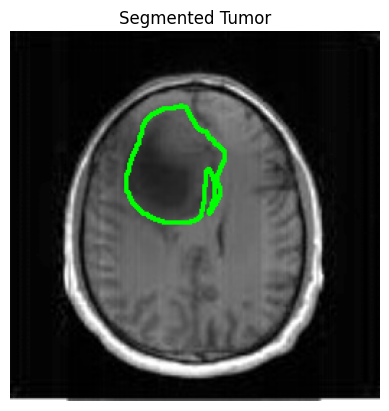

In [3]:
# Install necessary packages (for Colab only)
!pip install opencv-python-headless streamlit scikit-learn matplotlib tensorflow --quiet

# 📌 Import packages
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers, models

# 📌 Load inbuilt image (give your local path here)
image_path = '/content/sample_data/bt1a.jpg'  # MRI image
mask_path = '/content/sample_data/bt1.jpg'  # Segmentation mask

# 📌 Load and preprocess image
def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def resize_image(image, size=(256, 256)):
    return cv2.resize(image, size)

def normalize_image(image):
    scaler = MinMaxScaler(feature_range=(0, 1))
    return scaler.fit_transform(image)

# Load images
mri_image = load_image(image_path)
mask_image = load_image(mask_path)

# Resize and normalize
mri_image = resize_image(mri_image)
mask_image = resize_image(mask_image)
mri_image = normalize_image(mri_image)


# 📌 Define U-Net model
def unet_model(input_size=(256, 256, 1)):
    inputs = layers.Input(input_size)
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, 3, activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D(2)(c1)

    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, 3, activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D(2)(c2)

    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, 3, activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D(2)(c3)

    c4 = layers.Conv2D(512, 3, activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, 3, activation='relu', padding='same')(c4)

    u1 = layers.UpSampling2D(2)(c4)
    u1 = layers.concatenate([u1, c3])
    c5 = layers.Conv2D(256, 3, activation='relu', padding='same')(u1)
    c5 = layers.Conv2D(256, 3, activation='relu', padding='same')(c5)

    u2 = layers.UpSampling2D(2)(c5)
    u2 = layers.concatenate([u2, c2])
    c6 = layers.Conv2D(128, 3, activation='relu', padding='same')(u2)
    c6 = layers.Conv2D(128, 3, activation='relu', padding='same')(c6)

    u3 = layers.UpSampling2D(2)(c6)
    u3 = layers.concatenate([u3, c1])
    c7 = layers.Conv2D(64, 3, activation='relu', padding='same')(u3)
    c7 = layers.Conv2D(64, 3, activation='relu', padding='same')(c7)

    outputs = layers.Conv2D(1, 1, activation='sigmoid')(c7)
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# 📌 Initialize and summarize the model
model = unet_model()
model.summary()

# 📌 Show MRI and mask
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(mri_image, cmap='gray')
plt.title("Preprocessed MRI Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask_image, cmap='gray')
plt.title("Segmentation Mask")
plt.axis("off")
plt.show()

# 📌 Segment tumor using contours
def segment_tumor(image, mask):
    _, binary = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    result = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_GRAY2BGR)
    cv2.drawContours(result, contours, -1, (0, 255, 0), 2)
    return result

segmented = segment_tumor(mri_image, mask_image)

# 📌 Show segmented output
plt.imshow(segmented)
plt.title("Segmented Tumor")
plt.axis("off")
plt.show()